# Определение стоимости автомобилей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Дата-скачивания-анкеты" data-toc-modified-id="Дата-скачивания-анкеты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Дата скачивания анкеты</a></span></li><li><span><a href="#Год-регистрации" data-toc-modified-id="Год-регистрации-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Год регистрации</a></span></li><li><span><a href="#Исследуем-целевой-признак" data-toc-modified-id="Исследуем-целевой-признак-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследуем целевой признак</a></span></li><li><span><a href="#Зависимость-цены-от-бренда" data-toc-modified-id="Зависимость-цены-от-бренда-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Зависимость цены от бренда</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполним-пропуски-и-проверим-наличие-дубликатов" data-toc-modified-id="Заполним-пропуски-и-проверим-наличие-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполним пропуски и проверим наличие дубликатов</a></span></li><li><span><a href="#Заполним-нулевые-значения" data-toc-modified-id="Заполним-нулевые-значения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполним нулевые значения</a></span></li><li><span><a href="#Удалим-неинформативные-признаки" data-toc-modified-id="Удалим-неинформативные-признаки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удалим неинформативные признаки</a></span></li><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разделение данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Масштабирование-и-стандартизация" data-toc-modified-id="Масштабирование-и-стандартизация-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Масштабирование и стандартизация</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong>LightGBM</strong></a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong>Catboost</strong></a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span><strong>Stochastic Gradient Descent</strong></a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Важность признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания, метрика RMSE < 1800;
- скорость предсказания;

## Анализ данных

Проведем первичный анализ данных

In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split)

In [3]:
data = pd.read_csv("autos.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Признаки
`DateCrawled`— дата скачивания анкеты из базы
`VehicleType`— тип автомобильного кузова
`RegistrationYear`— год регистрации автомобиля
`Gearbox`— тип коробки передач
`Power`— мощность (л. с.)
`Model `— модель автомобиля
`Kilometer` — пробег (км)
`RegistrationMonth` — месяц регистрации автомобиля
`FuelType` — тип топлива
`Brand` — марка автомобиля
`Repaired` — была машина в ремонте или нет
`DateCreated` — дата создания анкеты
`NumberOfPictures` — количество фотографий автомобиля
`PostalCode` — почтовый индекс владельца анкеты (пользователя)
`LastSeen` — дата последней активности пользователя

Переведем названия признаков в более читаемый вид

In [6]:
data.columns = data.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]

C:\Users\Nayan\AppData\Local\Temp\ipykernel_4968\3846741158.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]


Процентное соотношение пропусков

In [7]:
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
date_crawled,0.000000
price,0.000000
vehicle_type,11.000000
registration_year,0.000000
gearbox,6.000000
power,0.000000
model,6.000000
kilometer,0.000000
registration_month,0.000000
fuel_type,9.000000


### Дата скачивания анкеты

In [8]:
data['date_crawled'] = data['date_crawled'].astype('datetime64[ns]')

In [9]:
data['date_crawled'].head()

0   2016-03-24 11:52:17
1   2016-03-24 10:58:45
2   2016-03-14 12:52:21
3   2016-03-17 16:54:04
4   2016-03-31 17:25:20
Name: date_crawled, dtype: datetime64[ns]

Дата скачивания анкеты ограничена 2016 годом, поэтому данные больше 2016 года не интересуют

### Год регистрации

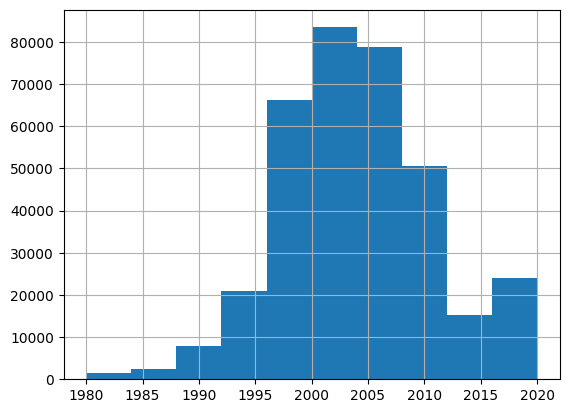

In [10]:
data['registration_year'].hist(range=(1980, 2020))
plt.show()

При предобработке удалим выбросы и ограничим даннын 1980 и 2016 годом

### Исследуем целевой признак

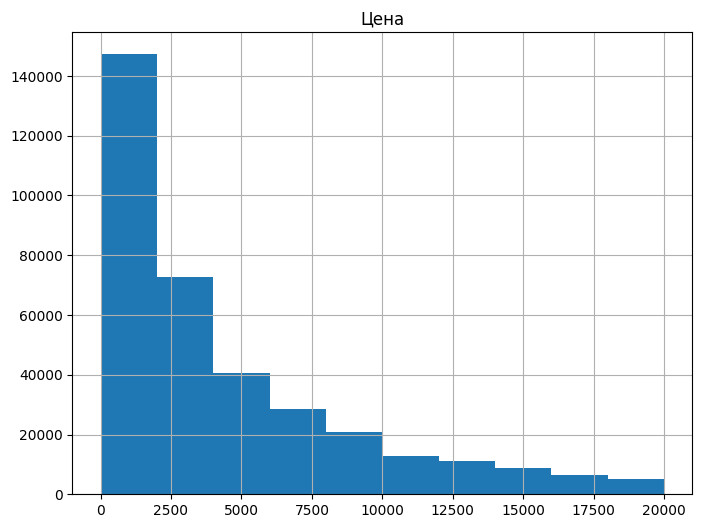

In [11]:
data['price'].hist( figsize= (8,6))
plt.title('Цена')
plt.show()

In [12]:
data['price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

In [13]:
data.loc[data['price'] == 0].count()

date_crawled          10772
price                 10772
vehicle_type           7032
registration_year     10772
gearbox                8294
power                 10772
model                  8588
kilometer             10772
registration_month    10772
fuel_type              7336
brand                 10772
repaired               5484
date_created          10772
number_of_pictures    10772
postal_code           10772
last_seen             10772
dtype: int64

В большинстве случаев продают непремиальные автомобили, имеющие небольшую стоимость, средняя цена автомобиля 4416. Заметны выбросы цены на автомобиль 0 быть не может 10 тысяч позиций, имеют пропуски.

### Зависимость цены от бренда

In [14]:
brand = data.pivot_table(index='brand', values='price', aggfunc=['count', 'sum', 'mean'])
brand.columns = ['count', 'sum','mean'] 
brand = brand.sort_values(by='mean',ascending=False)
brand

,count,sum,mean
brand,,,
porsche,758,8333960,10994.670185
mini,3202,28794453,8992.646159
land_rover,545,4594004,8429.365138
jeep,677,4783070,7065.096012
jaguar,505,3376197,6685.538614
audi,29456,183804748,6239.976507
bmw,36914,227471992,6162.214661
mercedes_benz,32046,189408127,5910.507614
skoda,5500,32502837,5909.606727


### Промежуточный вывод
В предобработке данных нужно:

**1) Заменить все пропуски на значение `unknown`**

**2) Удалить дубликаты**

**3) В колонке power присутствуют нулевые значения, заменить их медианой по Model и Brand**

**4) Удалить ненужные колонки**

## Предобработка данных

### Заполним пропуски и проверим наличие дубликатов

In [15]:
for i in data:
    data[i] = data[i].fillna('unknown') 

In [16]:
data.duplicated().sum()

4

In [17]:
data = data.drop_duplicates().reset_index(drop=True)

### Заполним нулевые значения 

In [18]:
data.loc[data['power'] == 0, 'power'] = float('nan')
data['power'] = data['power'].fillna(data.groupby(['brand', 'model'])['power'].transform('median'))

data['power'] = data['power'].fillna(data['power'].median())

In [19]:
data.loc[data['price'] == 0, 'price'] = float('nan')
data['price'] = data['price'].fillna(data.groupby(['brand', 'model'])['price'].transform('median'))

data['price'] = data['price'].fillna(data['price'].median())

In [20]:
data['power'] = data['power'].astype('int16')

### Удалим неинформативные признаки

In [21]:
data = data.drop(['date_crawled', 'date_created', 'number_of_pictures', 'registration_month',
                      'postal_code', 'last_seen', 'model'], axis=1 )

избавимся от года регистрации позже 2016 и до 1985

In [22]:
data = data.query("registration_year <= 2016")

Присутствуют нулевые значения в признаке price. Цена не может быть нулевой, к тому же это целевой признак. Самое интересное, что на нескольких сайтах по продаже подержанных автомобилей в Германии(по почтовому индексу) показало, что цены, действительно, начинаются с 0 и 1 евро, но это единичные объявления. Не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Другой возможный способ - удаление.

### Разделение данных 

Разделим данные на тестовую и тренировочную выборки

In [23]:
features = data.drop('price', axis=1)
target = data['price']

In [24]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
         test_size=0.25, random_state=12345, shuffle=True) 

## Обучение моделей

### Масштабирование и стандартизация

Для того чтобы модель работала корректно необходимо закодировать категориальные признаки. Кодировать признаковое пространство будем двумя способами `OHE` - прямое кодирование.

**Категориальные признаки**

In [62]:
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
ohe_features

['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'repaired']

**Числовые признаки**

In [63]:
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features

['registration_year', 'power', 'kilometer']

Трансформируем категориальные признаки в числовые 

In [64]:
X_train = features_train.copy()
X_test = features_test.copy()

In [65]:
col_transformer = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        ohe_features
    ),
    (
        StandardScaler(), 
        num_features
    ),
    remainder='passthrough',
    verbose_feature_names_out = False
)


X_train = pd.DataFrame.sparse.from_spmatrix(
    col_transformer.fit_transform(X_train),
    columns=col_transformer.get_feature_names_out()
)

X_train.head()

,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_unknown,vehicle_type_wagon,gearbox_manual,gearbox_unknown,...,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_unknown,repaired_yes,registration_year,power,kilometer
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.191238,-0.260674,0.578417
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617240,0.334449,0.578417
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.021763,-0.353491,-1.266100
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.305765,0.039617,0.578417
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.015769,-0.053200,0.578417


### **LightGBM**

In [39]:
%%time
model_lgb= lgb.LGBMRegressor(random_state=12345)

pipeline_lgb = Pipeline(steps= [['transformer', col_transformer],
                            ['model', model_lgb]])

param_grid_lgb = {
    'model__n_estimators': np.arange(10, 201, 10),
    'model__max_depth': np.arange(2, 20),
    'model__num_leaves': np.arange(2, 31, 2),
    'model__learning_rate': [0.01, 0.05, 0.1, 0.3]
}

gs_lgb = RandomizedSearchCV(
                            estimator=pipeline_lgb, 
                            param_distributions=param_grid_lgb,
                            n_jobs=-1,
                            scoring='neg_root_mean_squared_error',
                            random_state=12345,
                            cv=5,
                            error_score='raise'
)

gs_lgb.fit(features_train, target_train)

best_estimator_lgb = gs_lgb.best_estimator_
best_score_lgb = gs_lgb.best_score_
best_params_lgb = gs_lgb.best_params_

print('Лучшие значения LGB регрессии: {}'.format(best_score_lgb))
      
print('Лучшие параметры LGB регрессии: {}'.format(best_params_lgb))

Лучшие значения LGB регрессии: -1725.7947922069386
Лучшие параметры LGB регрессии: {'model__num_leaves': 16, 'model__n_estimators': 180, 'model__max_depth': 17, 'model__learning_rate': 0.3}
CPU times: total: 13.8 s
Wall time: 1min 6s


### **Catboost**

In [37]:
%%time
model_cat = CatBoostRegressor(random_seed=42,early_stopping_rounds=50)

param_grid_cat = {
    'iterations':  [100, 400],
    'learning_rate': [0.1,0.3],
    'depth': np.arange(2, 15),
    'eval_metric': ['RMSE']
}

gs_cat = RandomizedSearchCV(
    estimator=model_cat,
    param_distributions=param_grid_cat, 
    n_jobs=-1, 
    scoring='neg_root_mean_squared_error',
    random_state=12345,
    cv=5,
    error_score='raise')

gs_cat.fit(features_train, target_train, cat_features=ohe_features, verbose=20)

best_estimator_cat = gs_cat.best_estimator_
best_score_cat = gs_cat.best_score_
best_params_cat = gs_cat.best_params_

print('Лучшие значения CatBoost: {}'.format(best_score_cat))

print('Лучшие параметры CatBoost: {}'.format(best_params_cat))

0:	learn: 3540.3419542	total: 460ms	remaining: 3m 3s
20:	learn: 1680.1670521	total: 9.25s	remaining: 2m 46s
40:	learn: 1584.0274305	total: 18.9s	remaining: 2m 45s
60:	learn: 1519.1334013	total: 28.3s	remaining: 2m 37s
80:	learn: 1478.6996773	total: 38s	remaining: 2m 29s
100:	learn: 1445.9745330	total: 48.2s	remaining: 2m 22s
120:	learn: 1425.8703786	total: 57.8s	remaining: 2m 13s
140:	learn: 1403.0926079	total: 1m 8s	remaining: 2m 5s
160:	learn: 1386.1018836	total: 1m 18s	remaining: 1m 56s
180:	learn: 1366.7550868	total: 1m 28s	remaining: 1m 47s
200:	learn: 1354.4127911	total: 1m 38s	remaining: 1m 38s
220:	learn: 1339.7270830	total: 1m 49s	remaining: 1m 28s
240:	learn: 1327.0898286	total: 1m 59s	remaining: 1m 18s
260:	learn: 1316.6302283	total: 2m 9s	remaining: 1m 8s
280:	learn: 1306.6827890	total: 2m 19s	remaining: 59.2s
300:	learn: 1295.3742708	total: 2m 29s	remaining: 49.2s
320:	learn: 1286.4674135	total: 2m 39s	remaining: 39.3s
340:	learn: 1278.3325350	total: 2m 50s	remaining: 29.5

### **Stochastic Gradient Descent**

In [56]:
%%time
sgd = SGDRegressor(max_iter=1000,random_state = 12345) 

pipeline = Pipeline(steps= [['transformer', col_transformer],
                            ['model', sgd]])
param_grid = {
    'model__max_iter': [1000, 1500],
    'model__alpha': 10.0 ** -np.arange(1, 7),
    'model__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive', 'huber', 'squared_error'],
    'model__penalty': ['l2']
    
}

gs_sgd = GridSearchCV(estimator=pipeline,
                        param_grid = param_grid,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1,
                        cv=5,
                        error_score='raise')

gs_sgd.fit(features_train, target_train)

best_estimator_sgd = gs_sgd.best_estimator_
best_score_sgd = gs_sgd.best_score_
best_params_sgd = gs_sgd.best_params_

print('Лучшие значения Логистической регрессии: {}'.format(best_score_sgd))
      
print('Лучшие параметры Логистической регрессии: {}'.format(best_params_sgd))

Лучшие значения Логистической регрессии: -3289.922636252908
Лучшие параметры Логистической регрессии: {'model__alpha': 1e-06, 'model__loss': 'squared_error', 'model__max_iter': 1000, 'model__penalty': 'l2'}
CPU times: total: 27.5 s
Wall time: 1h 27min 21s


## Анализ моделей

In [60]:
pd.DataFrame({'Алгоритмы': ['LightGBM', 'CatBoost', 'SGD'],
             'RMSE(вал)': [- best_score_lgb,- best_score_cat,- best_score_sgd],})

,Алгоритмы,RMSE(вал)
0,LightGBM,1725.794792
1,CatBoost,1667.154805
2,SGD,3289.922636


Catboost занял намного больше времени чем LightGBM, но показатели RMSE уменьши достаточно, также SGD не подходит для данной задачи.

## Тестирование лучшей модели

In [67]:
best_estimator_cat.fit(features_train, target_train, cat_features=ohe_features, verbose=20)
predictions = best_estimator_cat.predict(features_test)
(mean_squared_error(target_test, predictions))**0.5

0:	learn: 3540.3419542	total: 693ms	remaining: 4m 36s
20:	learn: 1680.1670521	total: 9.66s	remaining: 2m 54s
40:	learn: 1584.0274305	total: 20s	remaining: 2m 55s
60:	learn: 1519.1334013	total: 29.2s	remaining: 2m 42s
80:	learn: 1478.6996773	total: 40.8s	remaining: 2m 40s
100:	learn: 1445.9745330	total: 51.8s	remaining: 2m 33s
120:	learn: 1425.8703786	total: 1m 1s	remaining: 2m 22s
140:	learn: 1403.0926079	total: 1m 13s	remaining: 2m 15s
160:	learn: 1386.1018836	total: 1m 24s	remaining: 2m 5s
180:	learn: 1366.7550868	total: 1m 35s	remaining: 1m 55s
200:	learn: 1354.4127911	total: 1m 46s	remaining: 1m 45s
220:	learn: 1339.7270830	total: 1m 58s	remaining: 1m 35s
240:	learn: 1327.0898286	total: 2m 9s	remaining: 1m 25s
260:	learn: 1316.6302283	total: 2m 19s	remaining: 1m 14s
280:	learn: 1306.6827890	total: 2m 30s	remaining: 1m 3s
300:	learn: 1295.3742708	total: 2m 40s	remaining: 52.8s
320:	learn: 1286.4674135	total: 2m 51s	remaining: 42.1s
340:	learn: 1278.3325350	total: 3m 6s	remaining: 32

1657.2970399725896

Catboost на тестовой выборке показал 1657, хороший результат, цель заказчика достигнуть метрики RMSE < 1800

## Важность признаков 

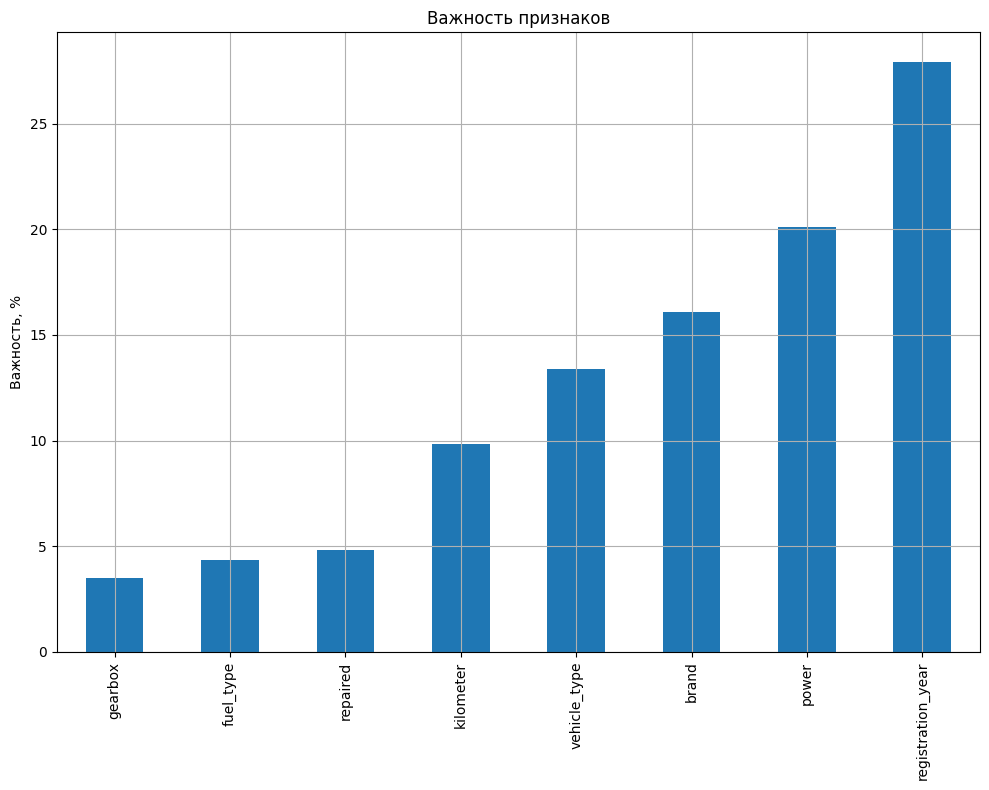

In [69]:
cat = pd.Series(best_estimator_cat.get_feature_importance(),
                         features_train.columns).sort_values()

fig, ax = plt.subplots(figsize=(10,8))
cat.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
ax.grid()
fig.tight_layout()

## Вывод

В данной работе, был проведен анализ данных, их предобработка, а именно: заполнение пропусков, удаление дубликатов, разделение данных на тестовую и обучающую выборки. Обучили три модели: Catboost, LightGBM, SGD, лучшей оказался Catboost со значение RMSE = 1675 на обучающей выборке. 